In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from urllib import request
#import json

In [2]:
url = 'https://covidtracking.com/api/states/daily'
dd = pd.read_json(url)

In [3]:
dd.head()
dd1 = dd.copy()

In [4]:
dd['date'] = pd.to_datetime(dd['date'], format = '%Y%m%d')
dd.head()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-03-30,AK,114.0,3540.0,NaN,7.0,3.0,3654,01a1c96fd2ed214d8747ab778c2fec7203c8cd2f,2020-03-30T20:00:00Z,3654,2,1.0,1.0,308.0,12.0,320.0
1,2020-03-30,AL,859.0,5694.0,NaN,NaN,6.0,6553,1ced1dbd9879f8bbc4b1f7b7876b82611895d58e,2020-03-30T20:00:00Z,6553,1,2.0,0.0,1510.0,53.0,1563.0
2,2020-03-30,AR,473.0,5262.0,NaN,62.0,7.0,5735,7199b3f9984cc54342a3d0f5926bff36ef440b6c,2020-03-30T20:00:00Z,5735,5,1.0,14.0,2235.0,47.0,2282.0
3,2020-03-30,AS,NaN,NaN,NaN,NaN,0.0,0,955da7e53291581ad33f46d87bad7e4724848fea,2020-03-30T20:00:00Z,0,60,0.0,0.0,0.0,0.0,0.0
4,2020-03-30,AZ,1157.0,15602.0,NaN,78.0,20.0,16759,2f64421fc130d03c93a0fa1b89e44c0324ac15a3,2020-03-30T20:00:00Z,16759,4,3.0,0.0,2649.0,238.0,2887.0


In [5]:
from datetime import date, timedelta

yesterday = date.today() - timedelta(days=1)
print("Today's date:", yesterday)
str(yesterday)

Today's date: 2020-03-30


'2020-03-30'

In [6]:
today = dd[dd['date'] == str(yesterday)]
today = today.sort_values('positive', ascending=False)
today.head()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
37,2020-03-30,NY,66497.0,119971.0,NaN,13721.0,1218.0,186468,755efe3e09da2292c390c480ff23e2251c09b43b,2020-03-30T20:00:00Z,186468,36,253.0,1646.0,7124.0,6984.0,14108.0
34,2020-03-30,NJ,16636.0,25224.0,NaN,NaN,198.0,41860,b608150f7f58bad4c4e94e88e9335f9388d47bea,2020-03-30T20:00:00Z,41860,34,37.0,0.0,3008.0,3250.0,6258.0
24,2020-03-30,MI,6498.0,11893.0,NaN,NaN,184.0,18391,ef7572a83f71543e3ee8804e389dd3f08da649b6,2020-03-30T20:00:00Z,18391,26,52.0,0.0,0.0,1012.0,1012.0
5,2020-03-30,CA,6447.0,20549.0,64400.0,1432.0,133.0,91396,ae23f3ed0050ca169785393619aae098baa36d78,2020-03-30T20:00:00Z,26996,6,10.0,398.0,0.0,739.0,739.0
21,2020-03-30,MA,5752.0,37041.0,NaN,453.0,56.0,42793,fdfd43359ac7ada466f488ec008cee5fdd97cbe1,2020-03-30T20:00:00Z,42793,25,8.0,54.0,2930.0,797.0,3727.0


Text(0.5, 0, 'No of cases')

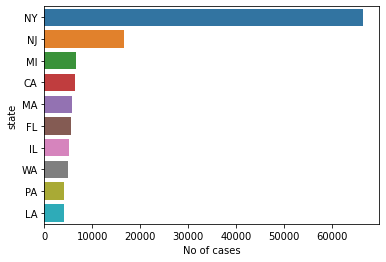

In [7]:
t1 = today.head(10)
ax = sns.barplot(t1['positive'], t1['state'])
ax.set_xlabel('No of cases')

In [13]:
NY = dd[dd['state'] == 'NY']
NJ = dd[dd['state'] == 'NJ']
LA = dd[dd['state'] == 'LA']

(array([737489., 737493., 737497., 737501., 737505., 737509., 737513.]),
 <a list of 7 Text major ticklabel objects>)

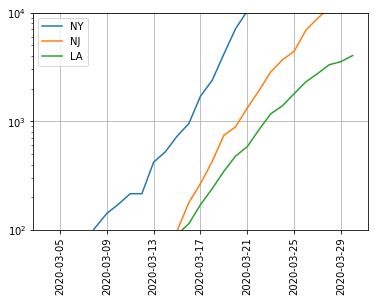

In [15]:
plt.plot(NY['date'], NY['positive'])
plt.plot(NJ['date'], NJ['positive'])
plt.plot(LA['date'], LA['positive'])
plt.legend(['NY', 'NJ', 'LA'])
plt.ylim(100,10000)
plt.yscale("log")
plt.grid(True)
plt.xticks(rotation=90)

In [15]:
NY.to_csv('NewYork.csv')